<a href="https://colab.research.google.com/github/TaNuNian/Basicpython_ESANTH/blob/main/Usecase_diabetes_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.Outcome.astype('category')

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
df.Pregnancies

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
x = df.drop(['DiabetesPedigreeFunction'],axis=1)
y = df.DiabetesPedigreeFunction

In [ ]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
train_data, test_data, train_y, test_y = train_test_split(x, y, test_size=0.30, shuffle=True)

In [ ]:
train_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
120,0,162,76,56,100,53.2,25,1
369,1,133,102,28,140,32.8,45,1
129,0,105,84,0,0,27.9,62,1
455,14,175,62,30,0,33.6,38,1
352,3,61,82,28,0,34.4,46,0
...,...,...,...,...,...,...,...,...
499,6,154,74,32,193,29.3,39,0
556,1,97,70,40,0,38.1,30,0
429,1,95,82,25,180,35.0,43,1
335,0,165,76,43,255,47.9,26,0


In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

test_scores = []
train_scores = []

for i in range(2,15):

    knn = KNeighborsRegressor(i)
    knn.fit(train_data,train_y)

    train_scores.append(knn.score(train_data,train_y))
    test_scores.append(knn.score(test_data,test_y))

In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 51.48253688749897 % and k = [1]


In [ ]:
knn = KNeighborsRegressor(2)
knn.fit(train_data,train_y)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
y_predict = knn.predict(test_data)
y_predict

array([0.606 , 0.2385, 0.811 , 0.3385, 0.6585, 0.2055, 0.551 , 0.417 ,
       0.1125, 0.4665, 0.8075, 0.21  , 0.3385, 0.423 , 0.3425, 0.5375,
       0.3175, 0.478 , 0.6095, 0.48  , 0.4305, 0.532 , 0.371 , 0.627 ,
       0.873 , 0.428 , 1.508 , 0.613 , 0.2425, 0.265 , 0.3715, 0.15  ,
       0.5105, 0.537 , 0.472 , 0.792 , 0.216 , 0.5695, 0.896 , 0.5915,
       0.8285, 0.733 , 0.324 , 0.54  , 0.268 , 0.5225, 0.2875, 0.58  ,
       0.207 , 0.1565, 0.364 , 0.3665, 0.4935, 0.3235, 0.273 , 0.362 ,
       0.149 , 0.2725, 0.283 , 0.2715, 0.6825, 0.298 , 1.3015, 0.636 ,
       0.421 , 0.4035, 0.5535, 0.574 , 0.619 , 0.5835, 0.8395, 0.569 ,
       0.675 , 0.3125, 0.421 , 0.4625, 0.281 , 0.2595, 0.4565, 0.231 ,
       0.489 , 0.6925, 0.4975, 0.269 , 0.2145, 0.811 , 0.214 , 0.876 ,
       0.452 , 0.368 , 0.3835, 0.202 , 0.6495, 0.1565, 0.557 , 0.368 ,
       0.6175, 0.3135, 0.5095, 0.488 , 0.509 , 0.5445, 0.2175, 0.4225,
       0.211 , 0.369 , 0.428 , 0.5995, 0.692 , 0.367 , 0.5555, 0.5045,
      

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y,y_predict))

ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(test_y,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       103
           1       0.65      0.33      0.44        51

    accuracy                           0.72       154
   macro avg       0.69      0.62      0.63       154
weighted avg       0.71      0.72      0.69       154



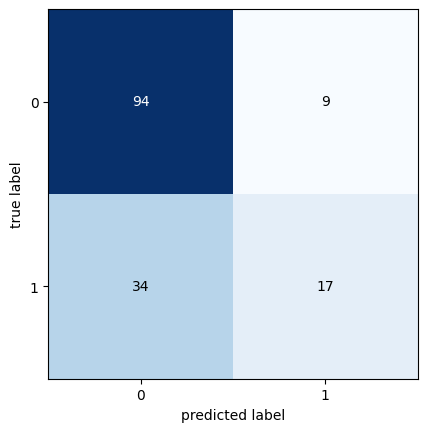

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(test_y,y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
print("MSE=", mean_squared_error(test_y,y_predict))
print("MAE=", mean_absolute_error(test_y,y_predict))

MSE= 0.1514563106060606
MAE= 0.27647835497835493
